In [ ]:
%%capture
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split

# Text Pre-processing libraries
import nltk
import string
import warnings
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

# Tensorflow imports to build the model.
import tensorflow as tf
from tensorflow import keras
from keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv("/content/labeled_data.csv")
df.head()


,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [ ]:
columns_to_drop=['count','hate_speech','offensive_language','neither','Unnamed: 0']
df=df.drop(columns=columns_to_drop,inplace=False)
df.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [ ]:
df.shape


(24783, 2)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   24783 non-null  int64 
 1   tweet   24783 non-null  object
dtypes: int64(1), object(1)
memory usage: 387.4+ KB


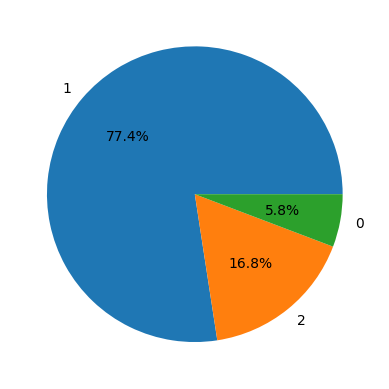

In [ ]:
plt.pie(df['class'].value_counts().values,
		labels = df['class'].value_counts().index,
		autopct='%1.1f%%')
plt.show()


In [ ]:
# Lower case all the words of the tweet before any preprocessing
df['tweet'] = df['tweet'].str.lower()

# Removing punctuations present in the text
punctuations_list = string.punctuation
def remove_punctuations(text):
	temp = str.maketrans('', '', punctuations_list)
	return text.translate(temp)

df['tweet']= df['tweet'].apply(lambda x: remove_punctuations(x))
df.head()


,class,tweet
0,2,rt mayasolovely as a woman you shouldnt compl...
1,1,rt mleew17 boy dats coldtyga dwn bad for cuff...
2,1,rt urkindofbrand dawg rt 80sbaby4life you eve...
3,1,rt cganderson vivabased she look like a tranny
4,1,rt shenikaroberts the shit you hear about me ...


In [ ]:
def remove_stopwords(text):
	stop_words = stopwords.words('english')

	imp_words = []

	# Storing the important words
	for word in str(text).split():

		if word not in stop_words:

			# Let's Lemmatize the word as well
			# before appending to the imp_words list.

			lemmatizer = WordNetLemmatizer()
			lemmatizer.lemmatize(word)

			imp_words.append(word)

	output = " ".join(imp_words)

	return output


df['tweet'] = df['tweet'].apply(lambda text: remove_stopwords(text))
df.head()


,class,tweet
0,2,rt mayasolovely woman shouldnt complain cleani...
1,1,rt mleew17 boy dats coldtyga dwn bad cuffin da...
2,1,rt urkindofbrand dawg rt 80sbaby4life ever fuc...
3,1,rt cganderson vivabased look like tranny
4,1,rt shenikaroberts shit hear might true might f...


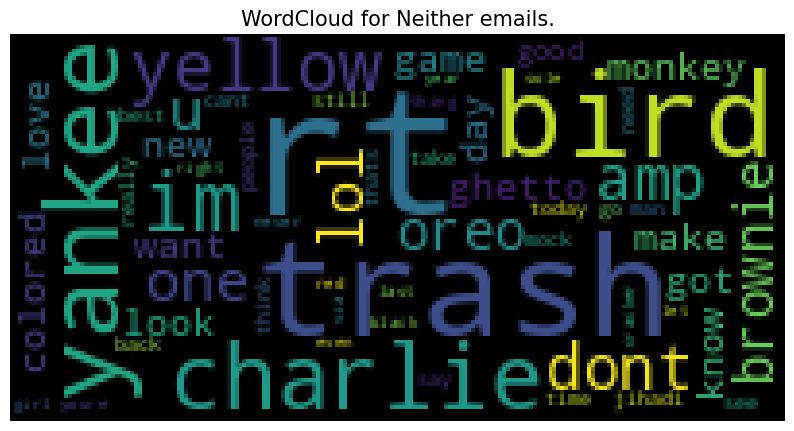

In [ ]:
def plot_word_cloud(data, typ):
    email_corpus = " ".join(data['tweet'])
    plt.figure(figsize=(10, 10))

    # Forming the word cloud
    wc = WordCloud(max_words=100,
                   width=200,
                   height=100,
                   collocations=False).generate(email_corpus)

    # Plotting the word cloud obtained above
    plt.title(f'WordCloud for {typ} emails.', fontsize=15)
    plt.axis('off')
    plt.imshow(wc)
    plt.show()
    print()

plot_word_cloud(df[df['class'] == 2], typ='Neither')


In [ ]:
class_2 = df[df['class'] == 2]
class_1 = df[df['class'] == 1].sample(n=3500)
class_0 = df[df['class'] == 0]

balanced_df = pd.concat([class_0, class_0, class_0, class_1, class_2], axis=0)


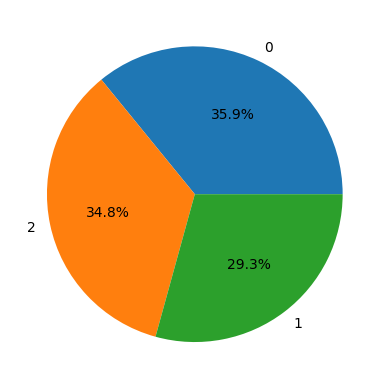

In [ ]:
plt.pie(balanced_df['class'].value_counts().values,
		labels=balanced_df['class'].value_counts().index,
		autopct='%1.1f%%')
plt.show()


In [ ]:
features = balanced_df['tweet']
target = balanced_df['class']

X_train, X_val, Y_train, Y_val = train_test_split(features,
												target,
												test_size=0.2,
												random_state=22)
X_train.shape, X_val.shape


((9562,), (2391,))

In [ ]:
Y_train = pd.get_dummies(Y_train)
Y_val = pd.get_dummies(Y_val)
Y_train.shape, Y_val.shape


((9562, 3), (2391, 3))

In [ ]:
max_words = 5000
max_len = 100

token = Tokenizer(num_words=max_words,
				lower=True,
				split=' ')

token.fit_on_texts(X_train)


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Ensure train_X and test_X are defined correctly
# Assuming they are lists of strings

max_words = 5000
token = Tokenizer(num_words=max_words,
                  lower=True,
                  split=' ')
token.fit_on_texts(X_train)

# Generating token embeddings
try:
    Training_seq = token.texts_to_sequences(X_train)
    Training_pad = pad_sequences(Training_seq,
                                 maxlen=50,
                                 padding='post',
                                 truncating='post')
except Exception as e:
    print("Error in tokenizing training data:", e)

try:
    Testing_seq = token.texts_to_sequences(X_train)
    Testing_pad = pad_sequences(Testing_seq,
                                maxlen=50,
                                padding='post',
                                truncating='post')
except Exception as e:
    print("Error in tokenizing testing data:", e)


In [ ]:
model = keras.models.Sequential([
	layers.Embedding(max_words, 32, input_length=max_len),
	layers.Bidirectional(layers.LSTM(16)),
	layers.Dense(512, activation='relu', kernel_regularizer='l1'),
	layers.BatchNormalization(),
	layers.Dropout(0.3),
	layers.Dense(3, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
			optimizer='adam',
			metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 32)           160000    
                                                                 
 bidirectional (Bidirection  (None, 32)                6272      
 al)                                                             
                                                                 
 dense (Dense)               (None, 512)               16896     
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 3)                 1

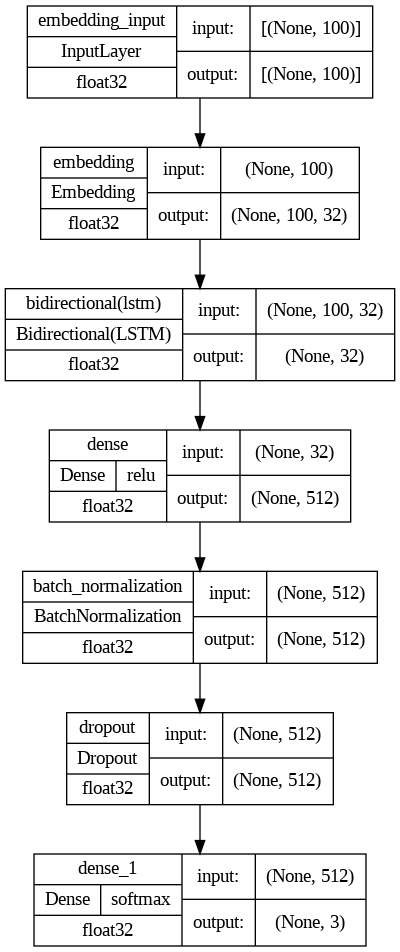

In [ ]:
keras.utils.plot_model(
	model,
	show_shapes=True,
	show_dtype=True,
	show_layer_activations=True
)


In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

es = EarlyStopping(patience=3,
				monitor = 'val_accuracy',
				restore_best_weights = True)

lr = ReduceLROnPlateau(patience = 2,
					monitor = 'val_loss',
					factor = 0.5,
					verbose = 0)


In [ ]:
print("Y_train_np" in globals())

False


In [ ]:
import pandas as pd

In [ ]:
Y_train.rename(columns={0: "label", 1: "not_label_1", 2: "not_label_2"}, inplace=True)
Y_val.rename(columns={0: "label", 1: "not_label_1", 2: "not_label_2"}, inplace=True)

In [ ]:
print("Y_train dtype:", Y_train["label"].dtype)
print("Y_val dtype:", Y_val["label"].dtype)

Y_train dtype: uint8
Y_val dtype: uint8


In [ ]:
print("Y_train dtype:", Y_train["label"].dtype)
print("Y_val dtype:", Y_val["label"].dtype)

Y_train dtype: uint8
Y_val dtype: uint8


In [ ]:
print("Training_pad shape:", Training_pad.shape)
print("Testing_pad shape:", Testing_pad.shape)
print("Y_train shape:", Y_train.shape)
print("Y_val shape:", Y_val.shape)

Training_pad shape: (9562, 50)
Testing_pad shape: (9562, 50)
Y_train shape: (9562, 3)
Y_val shape: (2391, 3)


In [ ]:
print("Y_train.shape:", Y_train.shape)
print("Y_val.shape:", Y_val.shape)

Y_train.shape: (9562, 3)
Y_val.shape: (2391, 3)


In [ ]:
print("Y_train.isnull().sum():", Y_train.isnull().sum())
print("Y_val.isnull().sum():", Y_val.isnull().sum())

Y_train.isnull().sum(): label          0
not_label_1    0
not_label_2    0
dtype: int64
Y_val.isnull().sum(): label          0
not_label_1    0
not_label_2    0
dtype: int64


In [ ]:
print("Y_train.columns:", Y_train.columns)
print("Y_val.columns:", Y_val.columns)

Y_train.columns: Index(['label', 'not_label_1', 'not_label_2'], dtype='object')
Y_val.columns: Index(['label', 'not_label_1', 'not_label_2'], dtype='object')


In [ ]:
# Check the columns of Y_train and Y_val
print("Y_train columns:", Y_train.columns)
print("Y_val columns:", Y_val.columns)

Y_train columns: Index(['label', 'not_label_1', 'not_label_2'], dtype='object')
Y_val columns: Index(['label', 'not_label_1', 'not_label_2'], dtype='object')


In [ ]:
missing_cols = set(Y_train.columns) - set(Y_val.columns)
if missing_cols:
    print("Missing columns in Y_val:", missing_cols)

In [ ]:
incorrect_cols = [col for col in Y_val.columns if col not in Y_train.columns]
if incorrect_cols:
    print("Incorrect column names in Y_val:", incorrect_cols)

In [ ]:
print("Y_train['not_label_1'].head():", Y_train['not_label_1'].head())
print("Y_val['not_label_1'].head():", Y_val['not_label_1'].head())

Y_train['not_label_1'].head(): 21627    0
16069    0
18085    0
22430    0
3699     0
Name: not_label_1, dtype: uint8
Y_val['not_label_1'].head(): 13556    1
15728    0
18880    0
14972    0
19080    1
Name: not_label_1, dtype: uint8


In [ ]:
print("Training_pad element type:", Training_pad[0][0].dtype)
print("Testing_pad element type:", Testing_pad[0][0].dtype)
print("Y_train element type:", Y_train["label"].iloc[0].dtype)
print("Y_val element type:", Y_val["label"].iloc[0].dtype)


Training_pad element type: int32
Testing_pad element type: int32
Y_train element type: uint8
Y_val element type: uint8


In [ ]:
print("Training_pad_reshaped shape:", Training_pad.shape)
print("Testing_pad_reshaped shape:", Testing_pad.shape)
print("Y_train_np shape:", Y_train.shape)
print("Y_val_np shape:", Y_val.shape)

print("Training_pad_reshaped dtype:", Training_pad.dtype)
print("Testing_pad_reshaped dtype:", Testing_pad.dtype)
print("Y_train_np dtypes:", Y_train.dtypes)
print("Y_val_np dtypes:", Y_val.dtypes)


Training_pad_reshaped shape: (9562, 50)
Testing_pad_reshaped shape: (9562, 50)
Y_train_np shape: (9562, 3)
Y_val_np shape: (2391, 3)
Training_pad_reshaped dtype: int32
Testing_pad_reshaped dtype: int32
Y_train_np dtypes: label          uint8
not_label_1    uint8
not_label_2    uint8
dtype: object
Y_val_np dtypes: label          uint8
not_label_1    uint8
not_label_2    uint8
dtype: object


In [ ]:
import numpy as np

# Assuming Y_train_np is a pandas DataFrame
Y_train_np = Y_train.to_numpy()  # Convert to NumPy array if not already
Y_train_np = np.reshape(Y_train, (-1, 3))


In [ ]:
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 32)           160000    
                                                                 
 bidirectional (Bidirection  (None, 32)                6272      
 al)                                                             
                                                                 
 dense (Dense)               (None, 512)               16896     
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 3)                 1

In [ ]:
print(f"Training data shape: {Training_pad.shape}")
print(f"Validation data shape: {Testing_pad.shape}")
print(f"Y_train_np shape: {Y_train.shape}")
print(f"Y_val_np shape: {Y_val.shape}")

Training data shape: (9562, 50)
Validation data shape: (9562, 50)
Y_train_np shape: (9562, 3)
Y_val_np shape: (2391, 3)


Epoch 1/10
299/299 [==============================] - 21s 71ms/step - loss: 0.2618 - accuracy: 0.9339 - val_loss: 0.4491 - val_accuracy: 0.8683
Epoch 2/10
299/299 [==============================] - 22s 74ms/step - loss: 0.2055 - accuracy: 0.9528 - val_loss: 0.5097 - val_accuracy: 0.8758
Epoch 3/10
299/299 [==============================] - 22s 74ms/step - loss: 0.1635 - accuracy: 0.9658 - val_loss: 0.4621 - val_accuracy: 0.8917
Epoch 4/10
299/299 [==============================] - 21s 69ms/step - loss: 0.1377 - accuracy: 0.9735 - val_loss: 0.5759 - val_accuracy: 0.8691
Epoch 5/10
299/299 [==============================] - 22s 73ms/step - loss: 0.1193 - accuracy: 0.9784 - val_loss: 0.5518 - val_accuracy: 0.8649
Epoch 6/10
299/299 [==============================] - 23s 77ms/step - loss: 0.1173 - accuracy: 0.9797 - val_loss: 0.5980 - val_accuracy: 0.8758
Epoch 7/10
299/299 [==============================] - 21s 69ms/step - loss: 0.1131 - accuracy: 0.9802 - val_loss: 0.5334 - val_accuracy:

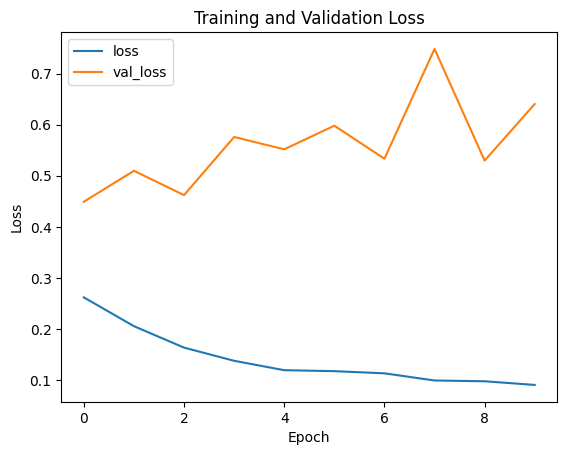

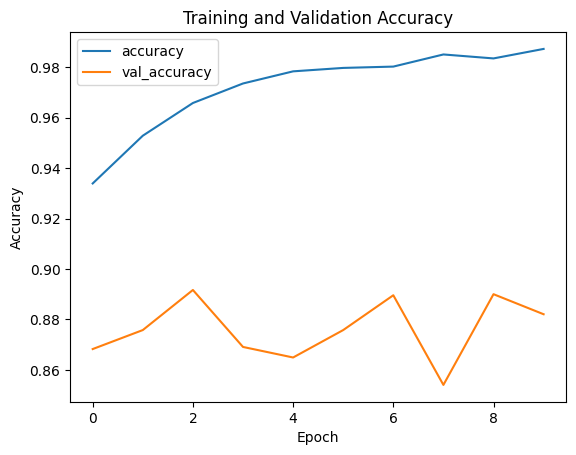

In [ ]:
# Train the model for multiple epochs
history = model.fit(Training_pad, Y_train,
                    validation_data=(Validation_pad, Y_val),
                    epochs=10,  # Train for 10 epochs
                    verbose=1)

# Plot the training and validation loss
history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot()
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Plot the training and validation accuracy
history_df[['accuracy', 'val_accuracy']].plot()
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()


In [ ]:
# Adjust the dropout rate
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_words, 32, input_length=max_len),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer='l1'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),  # Increase dropout rate
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model for multiple epochs
history1 = model.fit(Training_pad, Y_train,
                    validation_data=(Validation_pad, Y_val),
                    epochs=10,  # Train for 10 epochs
                    verbose=1)


Epoch 1/10
299/299 [==============================] - 29s 76ms/step - loss: 1.7565 - accuracy: 0.7276 - val_loss: 0.9836 - val_accuracy: 0.6336
Epoch 2/10
299/299 [==============================] - 23s 77ms/step - loss: 0.3746 - accuracy: 0.8953 - val_loss: 0.5219 - val_accuracy: 0.8499
Epoch 3/10
299/299 [==============================] - 23s 77ms/step - loss: 0.2709 - accuracy: 0.9290 - val_loss: 0.4286 - val_accuracy: 0.8816
Epoch 4/10
299/299 [==============================] - 23s 77ms/step - loss: 0.2148 - accuracy: 0.9494 - val_loss: 0.5528 - val_accuracy: 0.8369
Epoch 5/10
299/299 [==============================] - 21s 72ms/step - loss: 0.1811 - accuracy: 0.9582 - val_loss: 0.6888 - val_accuracy: 0.8578
Epoch 6/10
299/299 [==============================] - 23s 76ms/step - loss: 0.1503 - accuracy: 0.9660 - val_loss: 0.5683 - val_accuracy: 0.8724
Epoch 7/10
299/299 [==============================] - 23s 76ms/step - loss: 0.1437 - accuracy: 0.9701 - val_loss: 0.4450 - val_accuracy:

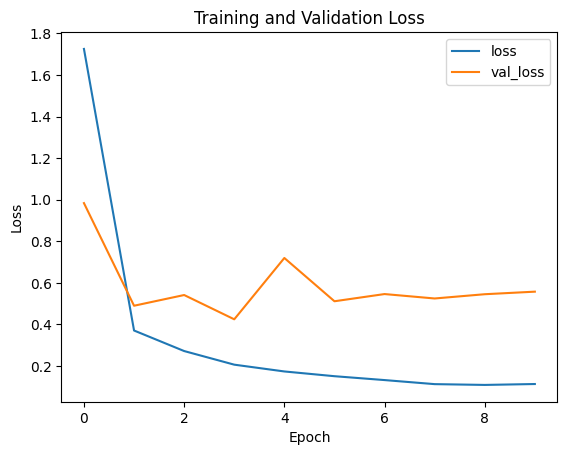

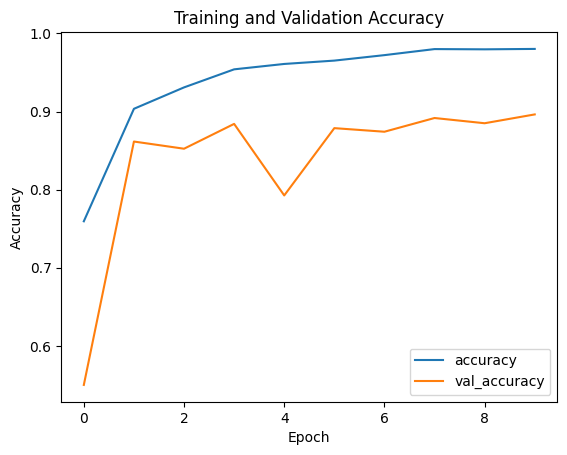

In [ ]:
history1_df = pd.DataFrame(history.history)
history1_df[['loss', 'val_loss']].plot()
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Plot the training and validation accuracy
history1_df[['accuracy', 'val_accuracy']].plot()
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# Get the final training and validation accuracy
training_accuracy = history1.history['accuracy'][-1]
validation_accuracy = history1.history['val_accuracy'][-1]

# Print the accuracy values

print(f" accuracy: {validation_accuracy:.4f}")

 accuracy: 0.8867


In [ ]:
for epoch, accuracy in enumerate(history.history['accuracy']):
    print(f"Epoch {epoch+1}: Training accuracy = {accuracy:.4f}")

for epoch, accuracy in enumerate(history.history['val_accuracy']):
    print(f"Epoch {epoch+1}: Validation accuracy = {accuracy:.4f}")

Epoch 1: Training accuracy = 0.7595
Epoch 2: Training accuracy = 0.9035
Epoch 3: Training accuracy = 0.9309
Epoch 4: Training accuracy = 0.9540
Epoch 5: Training accuracy = 0.9609
Epoch 6: Training accuracy = 0.9652
Epoch 7: Training accuracy = 0.9722
Epoch 8: Training accuracy = 0.9799
Epoch 9: Training accuracy = 0.9796
Epoch 10: Training accuracy = 0.9801
Epoch 1: Validation accuracy = 0.5500
Epoch 2: Validation accuracy = 0.8616
Epoch 3: Validation accuracy = 0.8524
Epoch 4: Validation accuracy = 0.8841
Epoch 5: Validation accuracy = 0.7926
Epoch 6: Validation accuracy = 0.8787
Epoch 7: Validation accuracy = 0.8741
Epoch 8: Validation accuracy = 0.8917
Epoch 9: Validation accuracy = 0.8850
Epoch 10: Validation accuracy = 0.8963
